<a href="https://colab.research.google.com/github/AilingLiu/Suport-Vector-Machine-in-Sklearn/blob/master/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Follow the tutorial of O'Reilly **Hands-on Machine Learning with scikit-learn, keras, and tesorflow**, chapter 5

# Set up

In [0]:
import sys
assert(sys.version_info >= (3,5))
import sklearn
assert(sklearn.__version__ >= '0.20')

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = '.'
PROJECT_ID = 'SVM'
PROJECT_PATH = os.path.join(PROJECT_ROOT_DIR, PROJECT_ID)
if not os.path.isdir(PROJECT_PATH):
  os.makedirs(PROJECT_PATH)

IMAGE_PATH = os.path.join(PROJECT_PATH, 'IMAGES')
if not os.path.isdir(IMAGE_PATH):
  os.makedirs(IMAGE_PATH)

MODEL_PATH = os.path.join(PROJECT_PATH, 'MODELS')
if not os.path.isdir(MODEL_PATH):
  os.makedirs(MODEL_PATH)

def save_fig(name, path=IMAGE_PATH, format='png', tight_layout=True, dpi=300):
  if not os.path.isdir(path):
    os.makedirs(path)
  file_path=os.path.join(path, name+'.'+format)
  if tight_layout:
    plt.tight_layout()

    
  plt.savefig(file_path, dpi=dpi, format=format)

import joblib
def save_pkl(clf, model_name, path=MODEL_PATH):
  model_path=os.path.join(path, model_name+'.pkl')
  joblib.dump(clf, model_path)
  print(f'{model_name} saved in {model_path}.')

# Linear Svm Classification

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
X = iris['data'][:, (2, 3)] #binary class: versicolor 1 or setosa 0
y = iris['target']

mask = (y!=2)
X=X[mask]
y=y[mask]

X.shape, y.shape

((100, 2), (100,))

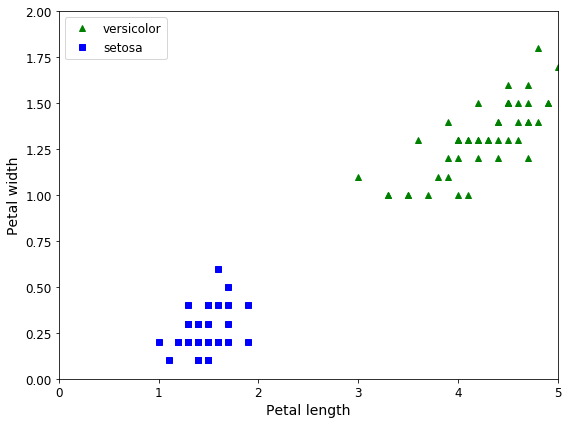

In [0]:
plt.figure(figsize=(8, 6))
plt.plot(X[y==1, 0], X[y==1, 1], 'g^', label='versicolor')
plt.plot(X[y==0, 0], X[y==0, 1], 'bs', label='setosa')
plt.axis([0, 5,0, 2])
plt.legend(loc='upper left', fontsize=12)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
save_fig('two_class_svm')


In [0]:
from sklearn.svm import SVC
lin_svc= SVC(kernel='linear', C=float('inf'))
lin_svc.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
lin_svc.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

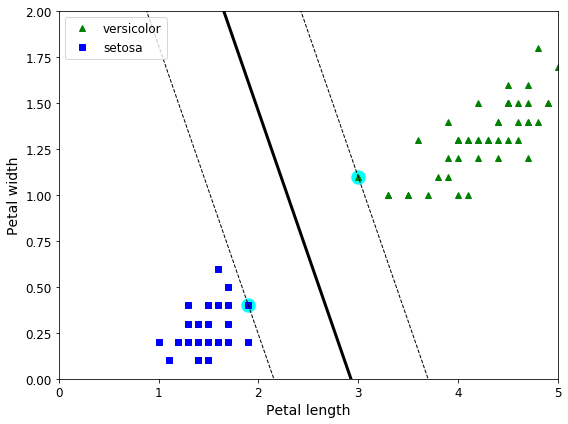

In [0]:
def plot_svc_decision_boundary(svc_clf, xmin, xmax):
  x0=np.linspace(xmin, xmax, 200)
  w = svc_clf.coef_[0]
  b = svc_clf.intercept_[0]

  decision_boundary = -w[0]/w[1] * x0 - b/w[1]

  margin = 1/w[1]
  gutter_up = decision_boundary + margin
  gutter_down = decision_boundary - margin

  support_vc = svc_clf.support_vectors_
  plt.scatter(support_vc[:, 0], support_vc[:, 1], s=180, facecolor='#00ffff')
  plt.plot(x0, decision_boundary, 'k-', linewidth=3)
  plt.plot(x0, gutter_up, 'k--', linewidth=1)
  plt.plot(x0, gutter_down, 'k--', linewidth=1)

plt.figure(figsize=(8, 6))
plt.plot(X[y==1, 0], X[y==1, 1], 'g^', label='versicolor')
plt.plot(X[y==0, 0], X[y==0, 1], 'bs', label='setosa')
plt.axis([0, 5,0, 2])
plt.legend(loc='upper left', fontsize=12)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plot_svc_decision_boundary(lin_svc, 0, 5)
save_fig('two_class_svm_decision_boundary')


when there are outliers in either side, it's not possible to be linearly seperable. In this case, we can reduce C to allow margin violations.

On top of that, SVM is sensitive to feature scales in minimizing margins.

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [0]:
svc_clf = Pipeline([
                    ('scaler', StandardScaler()),
                    ('lin_svc', LinearSVC(C=1, loss='hinge'))
])

svc_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [0]:
svc_clf.predict([[5.5, 1]])

array([1])

# Nonlinear SVM classification

for nonlinear svm classification, we can do:

- provide polynomial features to increase data dimension
- use svm kernel trick so we do not need to add extra features but increase dimensions internally: polynomial, rbf

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15)
X.shape

(100, 2)

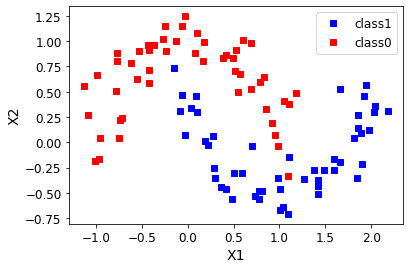

In [0]:
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='class1')
plt.plot(X[y==0, 0], X[y==0, 1], 'rs', label='class0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper right', fontsize=12)

In [0]:
# add polynomial features then use linear svc
from sklearn.preprocessing import PolynomialFeatures

poly_svc = Pipeline([
                     ('poly_features', PolynomialFeatures(degree=3)),
                     ('scaler', StandardScaler()),
                     ('lin_svc', LinearSVC(C=10, loss='hinge'))
])
poly_svc.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_svc',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

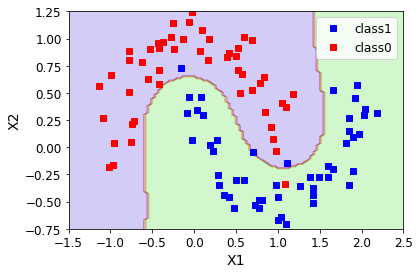

In [0]:
def plot_predictions(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_preds = clf.predict(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_preds, cmap=plt.cm.brg, alpha=0.2)

plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='class1')
plt.plot(X[y==0, 0], X[y==0, 1], 'rs', label='class0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper right', fontsize=12)
plot_predictions(poly_svc, [-1.5, 2.5, -0.75, 1.25])

In [0]:
# try polynomial kenel

poly_kernel_svm_clf = Pipeline([
                                ('scaler', StandardScaler()),
                                ('poly_kernel_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
                                
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly_kernel_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Text(0.5, 1.0, '$d=3, r=1, C=5$')

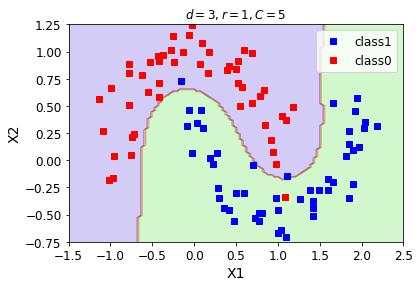

In [0]:
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='class1')
plt.plot(X[y==0, 0], X[y==0, 1], 'rs', label='class0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper right', fontsize=12)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -0.75, 1.25])
plt.title(r'$d=3, r=1, C=5$')

In [0]:
# try polynomial kenel

poly_kernel_svm_clf = Pipeline([
                                ('scaler', StandardScaler()),
                                ('poly_kernel_clf', SVC(kernel='poly', degree=10, coef0=100, C=5))
                                
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly_kernel_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Text(0.5, 1.0, '$d=10, r=100, C=5$')

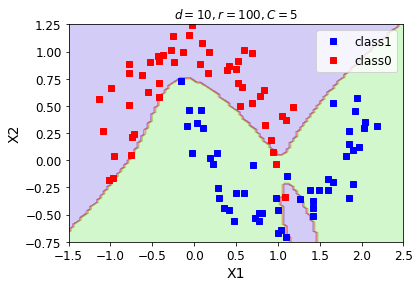

In [0]:
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='class1')
plt.plot(X[y==0, 0], X[y==0, 1], 'rs', label='class0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper right', fontsize=12)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -0.75, 1.25])
plt.title(r'$d=10, r=100, C=5$')

In [0]:
# using rbf
# try polynomial kenel

rbf_kernel_svm_clf = Pipeline([
                                ('scaler', StandardScaler()),
                                ('rbf_kernel_clf', SVC(kernel='rbf', gamma=5, C=0.0001))
                                
])

rbf_kernel_svm_clf.fit(X, y)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rbf_kernel_clf',
                 SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

Text(0.5, 1.0, '$\\gamma=5, C=0.0001$')

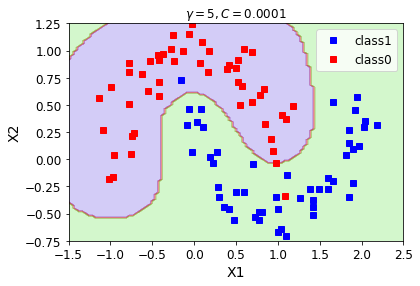

In [0]:

plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='class1')
plt.plot(X[y==0, 0], X[y==0, 1], 'rs', label='class0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper right', fontsize=12)
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -0.75, 1.25])
plt.title(r'$\gamma=5, C=0.0001$')

# SVM Regression

In [0]:
np.random.seed(42)
X = np.random.rand(100, 1)
y = 4 + 2*X+1.5 + np.random.randn(100, 1)

Text(0, 0.5, 'y')

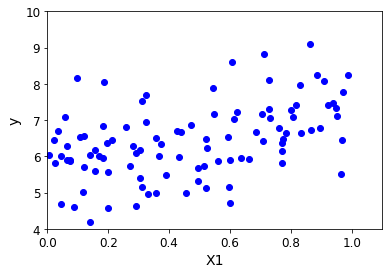

In [25]:
plt.plot(X, y, 'bo')
plt.axis([0, 1.1, 4, 10])
plt.xlabel('X1')
plt.ylabel('y')

In [27]:
from sklearn.svm import LinearSVR
lin_svr = LinearSVR(epsilon=1.5)
lin_svr.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

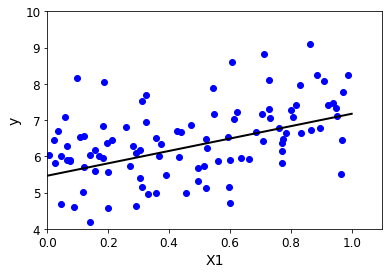

In [38]:
X_new = np.linspace(0, 1, 100).reshape(-1, 1)
preds = lin_svr.predict(X_new)


plt.plot(X, y, 'bo')
plt.axis([0, 1.1, 4, 10])
plt.xlabel('X1')
plt.ylabel('y')
plt.plot(X_new, preds, 'k-', linewidth=2)
#plt.plot(X_new, upper, 'k--', linewidth=1)
#plt.plot(X_new, lower, 'k--', linewidth=1)

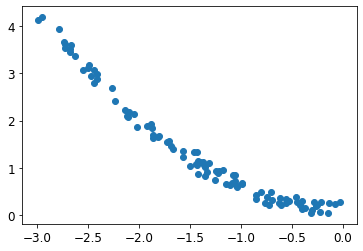

In [48]:
X = 3*np.random.rand(100, 1)-3
y = (0.2 + 0.5*(X**2) + (0.1*X) + np.random.randn(100, 1)/10).ravel()
plt.plot(X, y, 'bo')

In [50]:
from sklearn.svm import SVR

svr_pipeline = Pipeline([
                         ('scaler', StandardScaler()),
                         ('svr_poly', SVR(kernel='poly', degree=2, C=100, epsilon=0.1))
])
svr_pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr_poly',
                 SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [52]:
svr_pipeline.predict([[-0.5]])

array([1.94444826])